# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Apply your model to the train set

#### Importing and initializing the model class

In [5]:
# Let's use sklearn to stay consistent with above
from sklearn.linear_model import LinearRegression

# Initialize model
lr = LinearRegression()

#### Fitting the model to the train data

In [6]:
# Fit
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [7]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

#### Calculating your residuals

In [8]:
res_train = y_hat_train - y_train
res_test = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [9]:
mse_train = np.mean(res_train**2)
print(mse_train)

22.901786749465252


In [10]:
mse_test = np.mean(res_test**2)
print(mse_test)

17.999049990091212


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [11]:
split_options = np.linspace(.5, .95, num = 10)
split_options

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [12]:
np.random.seed(1111)

errors_train = []
errors_test = []

for i in split_options:
#     print(i)
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    
    # Generate train/test samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        
    # Fit the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)
    
    # Calc training error
    res_train = y_hat_train - y_train
    mse_train = np.mean(res_train**2)
    errors_train.append(mse_train)
    
    # Calc test error
    res_test = y_hat_test - y_test
    mse_test = np.mean(res_test**2)
    errors_test.append(mse_test)
    

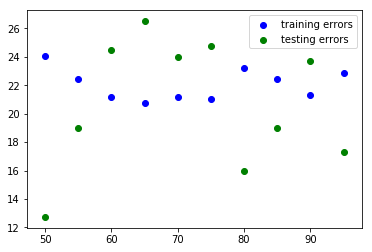

In [13]:
fig, ax = plt.subplots()

ax.scatter(split_options*100, errors_train, label="training errors", color="blue")
ax.scatter(split_options*100, errors_test, label="testing errors", color="green")
ax.legend()

plt.show()

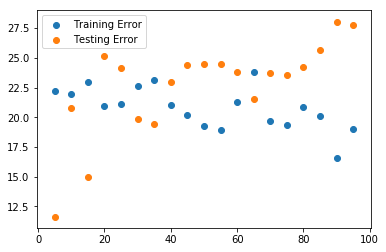

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [16]:
np.random.seed(1111)

errors_train = []
errors_test = []

for i in split_options:
#     print(i)

    iter_errors_train = []
    iter_errors_test = []

    for n in range(0,100):
        
        # Generate train/test samples
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

        # Fit the model
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_hat_train = lr.predict(X_train)
        y_hat_test = lr.predict(X_test)

        # Calc training error
        res_train = y_hat_train - y_train
        mse_train = np.mean(res_train**2)
        iter_errors_train.append(mse_train)

        # Calc test error
        res_test = y_hat_test - y_test
        mse_test = np.mean(res_test**2)
        iter_errors_test.append(mse_test)
        
    print("newloop")
#         print(np.mean(iter_errors_train))
    print(len(iter_errors_test))

    
#     errors_train.append(np.mean(iter_errors_train))
#     errors_test.append(np.mean(iter_errors_test))


newloop
100
newloop
100
newloop
100
newloop
100
newloop
100
newloop
100
newloop
100
newloop
100
newloop
100
newloop
100


In [50]:
len(errors_train)

1000

ValueError: x and y must be the same size

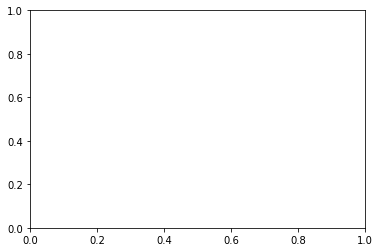

In [48]:
fig, ax = plt.subplots()

ax.scatter(split_options*100, errors_train, label="training errors", color="blue")
ax.scatter(split_options*100, errors_test, label="training errors", color="green")
ax.legend()

plt.show()

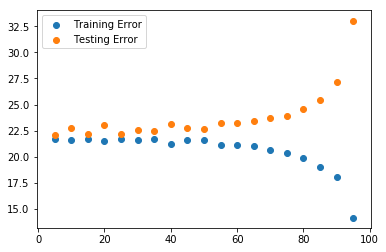

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.